# Lab 3 - Simple Neural Network
* An example which similar to "coffee roasting" 

## Python Evn: 3.9.6 [64-bit]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from lab_utils_common import dlc, sigmoid
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob,plt_layer,plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
# 设置日志输出级别，0为最低，可以改为1 试试




# DataSet
# This is the same data set as the previous lab.


In [4]:
X, Y = load_coffee_data(); 
print(X.shape,Y.shape)

(200, 2) (200, 1)


Plot the coffee roasting data

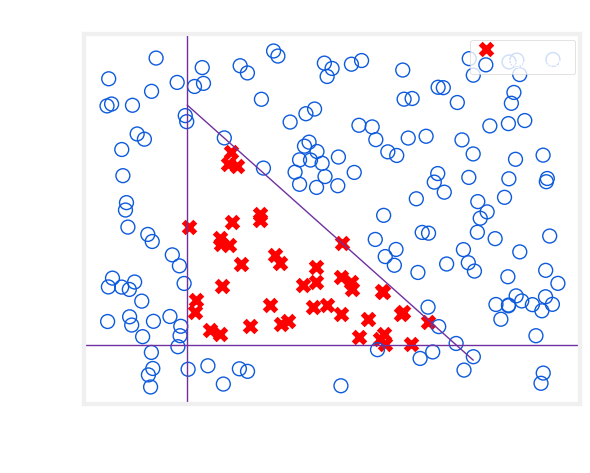

In [5]:
plt_roast(X,Y)

## Normalize Data
to match the previous lab, we'll normalize the data. Refer to that lab for more details

In [25]:
print(f"Temprature Max, Min per normalization: {np.max(X[:,0]):0.3f},{np.min(X[:,0]):0.2f}")
print(f"Duration   Max, Min per normalization: {np.max(X[:,1]):0.3f},{np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X) # laerns mean, variance
Xn = norm_l(X)
# print(Xn.shape)
# print(Xn) # matrix [200,2]
print(f"Temprature Max, Min per normalization: {np.max(Xn[:,0]):0.3f},{np.min(Xn[:,0]):0.2f}")
print(f"Duration   Max, Min per normalization: {np.max(Xn[:,1]):0.3f},{np.min(Xn[:,1]):0.2f}")



Temprature Max, Min per normalization: 284.994,151.32
Duration   Max, Min per normalization: 15.454,11.51
Temprature Max, Min per normalization: 1.660,-1.69
Duration   Max, Min per normalization: 1.793,-1.70


# Numpy Model (Forward Prop in NumPy)
<center> <img src="./images/C2_W1_RoastingNetwork.PNG" width="200"/> <center/>
Let's build the "Coffee Roasting Network" described in lecture. Thre are two layers tieh sigmoid activations.


As described in lecture, it is possible to build your own dense layer using NumPy. 
This can then be utilized to build a multi-layer neural network.

<img src="images/C2_W1_dense3.png" width = "600" height = "450">

In the first optinal lab, you constructed a neuron in NumPy and in Tensorflow and noted their similarity. 
* A layer simply contains mulfiple neurons/units.
As described in lecture, one can utilize a for loop to visit each unit ($j$) in the layer and perform the dot product of the weights for that unit($W[:,j]$) and sum the bias for the unit ($[b]$) to form $z$. 
* An activation function $g(z)$ can sum the bias for unit ($b[j]$) to form $z$. 
* An activation fucntion $g(z)$ can then be applied to that result. 
* Let's try that below to build a "dense layer" subroutine.

# Subroutine 
## Step 1
First, you will define the activation fucntion $g()$.  You will use the $sigmoid()$ fucntion withc is already implementd for your in the `lab_utils_common.py` fiel outside the notebook.

In [26]:
# Define the activation function
g = sigmoid
print(g(0))

0.5


## Step 2
Next, you will define the `my_dense()` function fwhich computers the activations of a dense layer.


$$
\begin{array}{rcl}
a_{\text{out}} &=& M \cdot a_{\text{in}} + b \\
\scriptstyle{(j)} & & \scriptstyle{(n \times j) (n) \quad (j)}
\end{array}
$$


In [90]:
def my_dense(a_in, W,b):
    """
    Computer dense layer
    Args:
        a_in (ndarray (n, )) : Data, 1 example 
        W    (ndarray (n,j)) : Weitht matrix, n features per unit, j units
        b    (ndarray (j, )  : bias vector, j units
    Retures
        a_out (ndarray (j,)) : j units|
    """
    units = W.shape[1]
    a_out = np.zeros(units)
    for j in range(units):
        w = W[:,j]
        z = np.dot(w,a_in) + b[j]
        a_out[j] = g(z)
    return (a_out)

### Note:
You can also implement the function above to accept `g` as an additional parameter (e.g. `my_dense(a_in, W,b,h)`). 
* In this notebook though, you will only use one type of activation function (i.e. sigmoid) so it's okay it to make it constant and define it outsid the function. 
* That's what you did in the code above and it makes the function calls in the next code cellls simpler. Just keep in mind that passing it as a parameter is alos anacceptable implementation. 
* You will see that in this week's assignment.

## Step 3
The following cell builds as two-layer neural network utilizing the `my_dense` subroutine above.

In [91]:
def my_sequential(x,W1,b1,W2,b2):
    a1 = my_dense(x, W1, b1)
    a2 = my_dense(a1, W2,b2)
    return(a2)

We can copy trained wights and biases from the previous lab in Tensorflow

In [92]:
W1_tmp = np.array([ [-8.93, 0.29, 12.9],[-0.1,-7.32,10.81] ])
b1_tmp = np.array( [-9.82, -9.28, 0.96])
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41])

## Predictions
<img align="left" src="./images/C2_W1_RoastingDecision.PNG" style = "width:380px; padding: 10px 20px; ">
* Once you have a trained model, you can then use it to make predictions. 
* Recall that the output of our model is a probability. 
* In this case, the probability of a good roast. 
* To make a decision, one must apply the probability to a threashold.
* In this case, we will use 0.5

Let's start by writing a routine similar to Tensorflow's `model.predict()`. This wil take matrix $X$ with all $m$ examples in the rows and make a prediction by running the model.

In [93]:
def my_predict(X,W1, b1, W2, b2):
    m = X.shape[0]
    p = np.zeros((m,1))
    for i in range(m):
        p[i,0] = my_sequential(X[i],W1,b1,W2,b2)
    return(p)

In [94]:
def ttt(X, W1, b1, W2, b2):
    m = X.shape[0]
    p = np.zeros((m,1))
    for i in range(m):
        p[i,0] = my_sequential(X[i], W1, b1, W2, b2)
    return(p)

We can try this routine on two example:

In [97]:
X_tst = np.array([
    [200,13.9],   # postive example
    [200,17]      # negative example
])
X_tstn = norm_l(X_tst)  # remember to normalize 
predictions = my_predict(X_tstn , W1_tmp, b1_tmp,W2_tmp, b2_tmp)
print(predictions)

[[9.72e-01]
 [3.29e-08]]


To convert hte probabilities to a decision, we apply a threshold:

In [100]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(yhat)


[[1.]
 [0.]]


In [106]:
yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]


# Network function
* This graph shows the operation of the whole network and is identical to the Tensorflow result form the previous lab. 
* The left graph is the raw output of the final layer represented by the blu shading. 
* This is overlaid on hte training data represented by the X's and O's here correspond to dicisions made by the network.

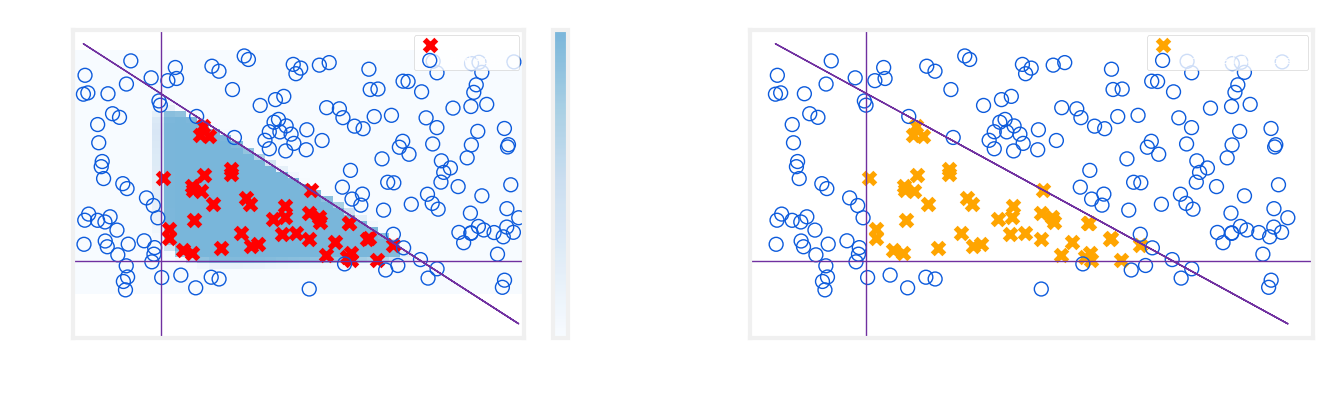

In [107]:
netf = lambda x: my_predict(norm_l(x), W1_tmp, b1_tmp,W2_tmp, b2_tmp)
plt_network(X,Y,netf)